<a href="https://colab.research.google.com/github/Nawaf9997/T5_SDAIA_Traffic_Anlysis/blob/main/Time_Series_Forecasting_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [49]:
import pandas as pd

df = pd.read_csv('/content/Aquifer_Petrignano.csv', parse_dates=['Date'], dayfirst=True)

df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

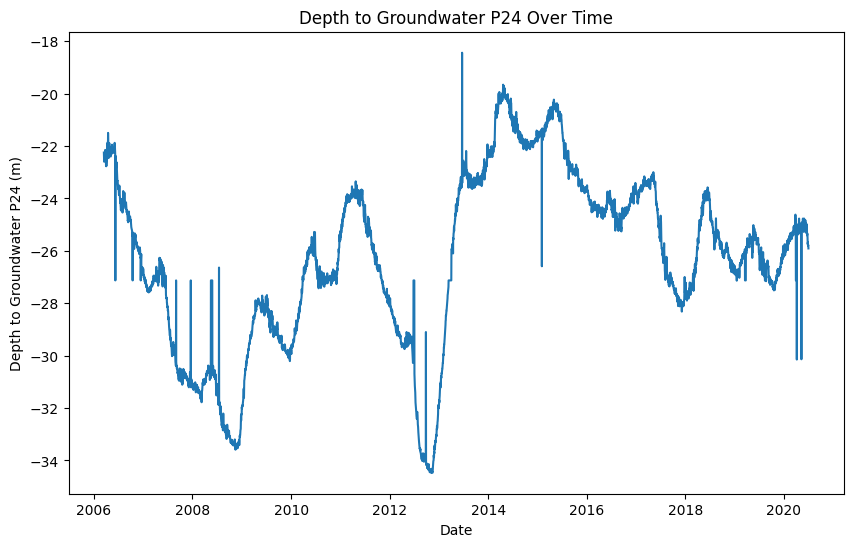

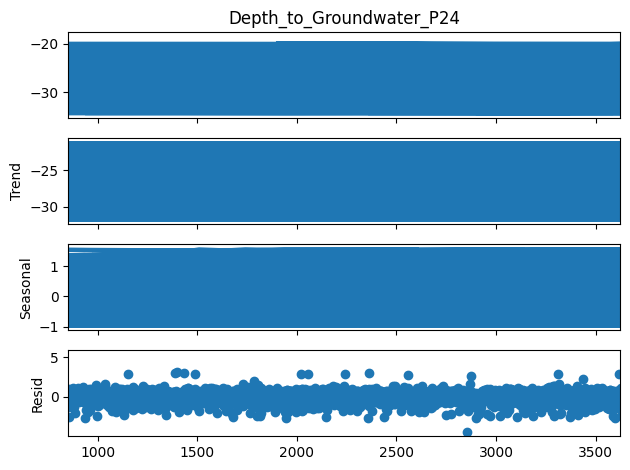

In [71]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plotting the target variable
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Depth_to_Groundwater_P24'])
plt.title('Depth to Groundwater P24 Over Time')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater P24 (m)')
plt.show()

# Seasonal decomposition
decomposition = seasonal_decompose(df['Depth_to_Groundwater_P24'], model='additive', period=365)
decomposition.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [51]:
df.isna().sum()

,0
Date,0
Rainfall_Bastia_Umbra,1024
Depth_to_Groundwater_P24,55
Depth_to_Groundwater_P25,39
Temperature_Bastia_Umbra,1024
Temperature_Petrignano,1024
Volume_C10_Petrignano,198
Hydrometry_Fiume_Chiascio_Petrignano,1024


In [52]:
mode_columns = ['Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra', 'Temperature_Petrignano',
                'Volume_C10_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano']


for col in mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isna().sum())


Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64


In [54]:
# Ensure the dates are sorted
df.sort_values('Date', inplace=True)

# Create lag features
df['Prev_Depth_to_Groundwater_P24'] = df['Depth_to_Groundwater_P24'].shift(1)

# Drop NaN values generated by shifting
df.dropna(inplace=True)

In [55]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Prev_Depth_to_Groundwater_P24
1525,2006-03-15,0.0,-22.38,-22.14,11.4,0.0,0.0,2.0,-22.48
852,2006-03-16,0.0,-22.25,-22.04,11.4,0.0,0.0,2.0,-22.38
2448,2006-03-17,0.0,-22.38,-22.04,11.4,0.0,0.0,2.0,-22.25
1984,2006-03-18,0.0,-22.60,-22.04,11.4,0.0,0.0,2.0,-22.38
2686,2006-03-19,0.0,-22.35,-21.95,11.4,0.0,0.0,2.0,-22.60


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [56]:
# Extracting time-based features
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['IsWeekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# Difference feature
df['Diff_Depth_to_Groundwater_P24'] = df['Depth_to_Groundwater_P24'].diff()

# Drop NaN values generated by differencing
df.dropna(inplace=True)

In [58]:
df.sample(5)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Prev_Depth_to_Groundwater_P24,Day_of_Week,Month,Day_of_Year,IsWeekend,Diff_Depth_to_Groundwater_P24
928,2013-03-30,0.0,-27.13,-25.79,13.7,12.8,-33429.024,2.6,-27.13,5,3,89,1,0.00
802,2008-09-06,0.0,-33.02,-32.21,11.4,0.0,-38145.600,2.0,-33.01,5,9,250,1,-0.01
4716,2013-12-16,0.0,-22.63,-21.91,3.2,5.0,-28761.696,2.4,-22.67,0,12,350,0,0.04
3457,2018-05-14,6.8,-24.13,-23.62,15.1,15.0,-27222.048,2.6,-24.18,0,5,134,0,0.05
3042,2012-08-17,0.0,-33.70,-32.74,28.5,27.5,-33979.392,1.9,-33.56,4,8,230,0,-0.14


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [59]:
#Use an 80/20 split ratio as an example.
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Prev_Depth_to_Groundwater_P24', 'Day_of_Week', 'Month', 'Day_of_Year', 'IsWeekend']])
test_scaled = scaler.transform(test[['Prev_Depth_to_Groundwater_P24', 'Day_of_Week', 'Month', 'Day_of_Year', 'IsWeekend']])


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [62]:
# Training the ARIMA model

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [63]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train['Depth_to_Groundwater_P24'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [64]:
# Making predictions
predictions_arima = arima_model_fit.forecast(steps=len(test))

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE
mse_arima = mean_squared_error(test['Depth_to_Groundwater_P24'], predictions_arima)
rmse_arima = np.sqrt(mse_arima)

print(f'ARIMA Model - MSE: {mse_arima}, RMSE: {rmse_arima}')

ARIMA Model - MSE: 1.6142798068235715, RMSE: 1.2705431149014863


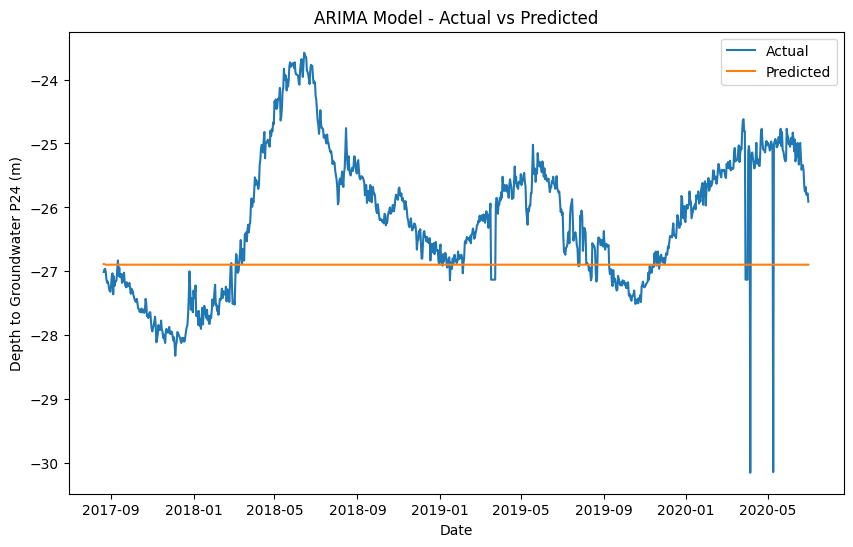

In [66]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test['Depth_to_Groundwater_P24'], label='Actual')
plt.plot(test['Date'], predictions_arima, label='Predicted')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater P24 (m)')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = train_scaled.reshape((train_scaled.shape[0], 1, train_scaled.shape[1]))
X_test_lstm = test_scaled.reshape((test_scaled.shape[0], 1, test_scaled.shape[1]))

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
history = model_lstm.fit(X_train_lstm, train['Depth_to_Groundwater_P24'], epochs=50, validation_data=(X_test_lstm, test['Depth_to_Groundwater_P24']), verbose=1)


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 700.1027 - val_loss: 593.5312
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 544.3660 - val_loss: 281.8805
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 242.0630 - val_loss: 102.5658
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.7879 - val_loss: 75.4055
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 98.9292 - val_loss: 63.1566
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.6322 - val_loss: 53.7086
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79.6943 - val_loss: 45.7649
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.9052 - val_loss: 38.9918
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64.8542 - val_loss: 33.1044
Epoch 10/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.0223 - val_loss: 27.7330
Epoch 11/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.1194 - val_loss: 22.2662
Epoch 12/50
131/131 ━━━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [68]:
# Making predictions with LSTM
predictions_lstm = model_lstm.predict(X_test_lstm)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [69]:
# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(test['Depth_to_Groundwater_P24'], predictions_lstm))

print(f'LSTM Model - RMSE: {rmse_lstm}')

LSTM Model - RMSE: 0.392415773182884


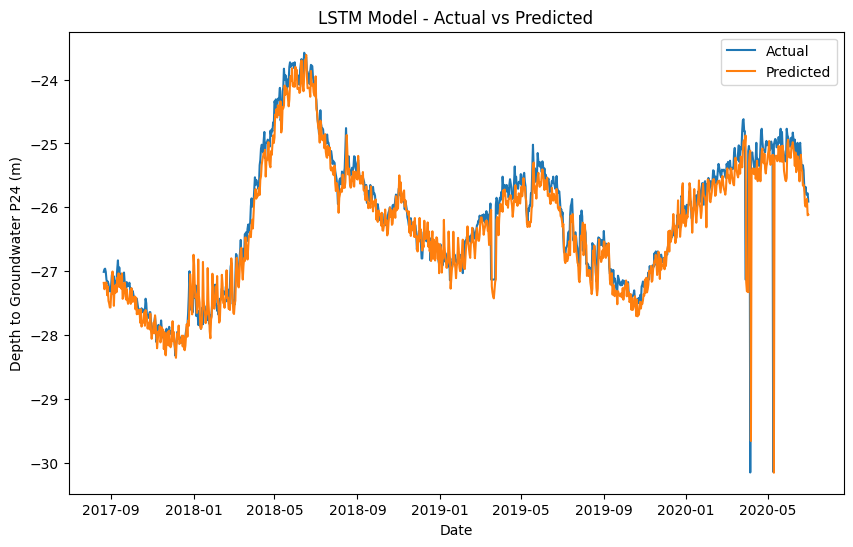

In [70]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test['Depth_to_Groundwater_P24'], label='Actual')
plt.plot(test['Date'], predictions_lstm, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Depth to Groundwater P24 (m)')
plt.legend()
plt.show()

## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.

# **ARIMA Model:**

MSE: The ARIMA model yielded a Mean Squared Error (MSE) of 1.6143, indicating the average squared difference between the predicted and actual values.
RMSE: The Root Mean Squared Error (RMSE) of 1.2705 meters suggests that, on average, the ARIMA model's predictions are off by about 1.27 meters. This level of error indicates that while the ARIMA model captures some of the trends in the data, it may struggle with more complex patterns or fluctuations in groundwater levels.

# **LSTM Model:**

RMSE: The LSTM model achieved a significantly lower RMSE of 0.3924 meters. This indicates a much closer alignment between the predicted and actual values, with an average error of less than half a meter. This suggests that the LSTM model is much more effective in modeling the time series data, particularly in capturing the nonlinear relationships and temporal dependencies inherent in the groundwater levels.

```
```


# ***Effectiveness of the Models:***






**ARIMA Model:**

The ARIMA model, which is traditionally used for linear time series forecasting, performed reasonably well but fell short in accurately capturing the more intricate patterns in the data. The higher RMSE indicates that the model might not be sufficient for applications where precision is critical. However, ARIMA can still be valuable for initial explorations or when computational simplicity is needed.

**LSTM Model:**

The LSTM model demonstrated superior performance, with a much lower RMSE. This reflects LSTM’s strength in handling sequential data and learning from long-term dependencies. The ability to model complex, non-linear interactions makes LSTM particularly suitable for this kind of environmental time series forecasting. The lower RMSE indicates that the LSTM model is more reliable for making accurate predictions, making it a better choice for practical applications that require high precision.

